In [0]:
import pandas as pd
import numpy as np
from scipy import stats 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [0]:
#Zip file contains only the csv, so you can access it directly with read_csv

df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/diabetic-data-cleaning.zip', 
                 usecols = ['readmitted','race','gender','age', 'weight', 'time_in_hospital', 'num_lab_procedures', 'num_procedures',
                            'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1' , 'diag_2', 'diag_3', 'number_diagnoses'],
                 compression='zip')

#Read through this and figure out what we're doing here
for col in df.describe().columns: 
    nanidx = df[col].sample(frac=np.random.uniform(0.0, 0.001)).index 
    df.loc[nanidx, col] = '?'

# Zip file contains only the csv, so you can access it directly with read_csv df = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/diabetic-data-cleaning.zip', compression='zip')
#Read through this and figure out what we're doing here
for col in df.describe().columns: 
    nanidx = df[col].sample(frac=np.random.uniform(0.0, 0.001)).index 
    df.loc[nanidx, col] = '?'

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 16 columns):
race                  101766 non-null object
gender                101766 non-null object
age                   101766 non-null object
weight                101766 non-null object
time_in_hospital      101766 non-null object
num_lab_procedures    101766 non-null object
num_procedures        101766 non-null object
num_medications       101766 non-null object
number_outpatient     101766 non-null object
number_emergency      101766 non-null object
number_inpatient      101766 non-null object
diag_1                101766 non-null object
diag_2                101766 non-null object
diag_3                101766 non-null object
number_diagnoses      101766 non-null object
readmitted            101766 non-null object
dtypes: object(16)
memory usage: 12.4+ MB


In [92]:
df.head()

,race,gender,age,weight,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,readmitted
0,Caucasian,Female,[0-10),?,1,41,0,1,0,0,0,250.83,?,?,1,NO
1,Caucasian,Female,[10-20),?,3,59,0,18,0,0,0,276,250.01,255,9,>30
2,AfricanAmerican,Female,[20-30),?,2,11,5,13,2,0,1,648,250,V27,6,NO
3,Caucasian,Male,[30-40),?,2,44,1,?,0,0,0,8,250.43,403,7,NO
4,Caucasian,Male,[40-50),?,1,51,0,8,0,0,0,197,157,250,5,NO


In [93]:
df['gender'].unique()

array(['Female', 'Male', '?', 'Unknown/Invalid'], dtype=object)

In [0]:
df['gender'] = df['gender'].replace('?','Unknown/Invalid')

In [95]:
df['gender'].unique()

array(['Female', 'Male', 'Unknown/Invalid'], dtype=object)

In [0]:
df['weight'] = df['weight'].replace('?',np.NaN)

In [97]:
df['weight'].value_counts()

[75-100)     1336
[50-75)       896
[100-125)     625
[125-150)     145
[25-50)        97
[0-25)         48
[150-175)      35
[175-200)      11
>200            3
Name: weight, dtype: int64

In [98]:
df['time_in_hospital'] = df['time_in_hospital'].replace('?',np.NaN)
df['time_in_hospital'].unique()


array([ 1.,  3.,  2.,  4.,  5., 13., 12.,  9.,  7., 10.,  6., 11.,  8.,
       14., nan])

In [99]:
df['weight'].unique()


array([nan, '[75-100)', '[50-75)', '[0-25)', '[100-125)', '[25-50)',
       '[125-150)', '[175-200)', '[150-175)', '>200'], dtype=object)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

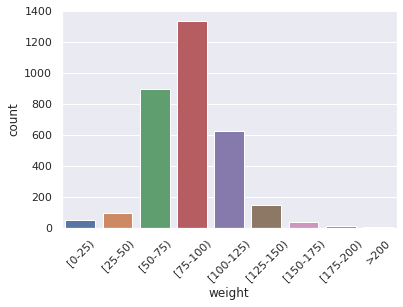

In [100]:
sns.countplot(df['weight'], order = ['[0-25)','[25-50)','[50-75)','[75-100)','[100-125)', '[125-150)','[150-175)','[175-200)','>200'])
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

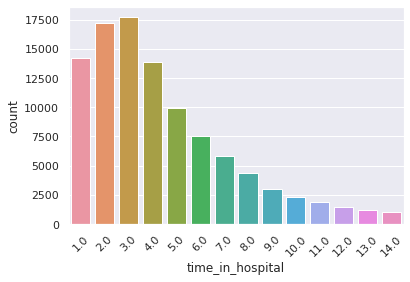

In [101]:
sns.countplot(df['time_in_hospital'])
plt.xticks(rotation=45)

In [0]:
df.replace('?', np.nan, inplace=True)

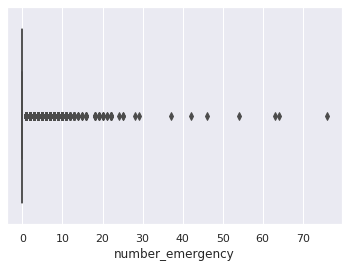

In [103]:
sns.boxplot(df["number_emergency"])

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


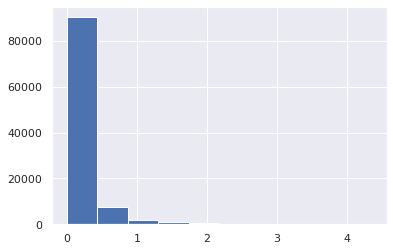

In [104]:
plt.hist(np.log(df["number_emergency"] + 1))
plt.show()

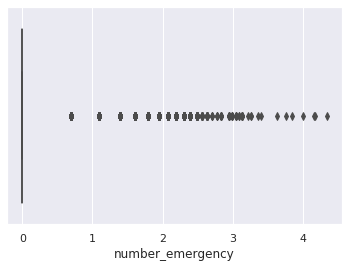

In [105]:
sns.boxplot(np.log(df["number_emergency"] + 1))
plt.show()

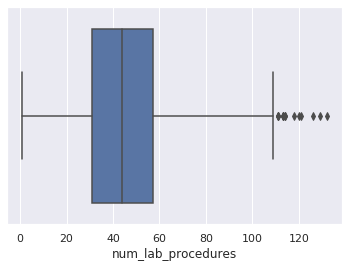

In [106]:
sns.boxplot(df["num_lab_procedures"], whis=2)
plt.show()

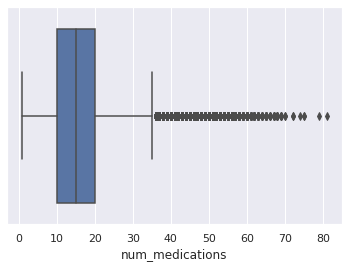

In [107]:
sns.boxplot(df["num_medications"])
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


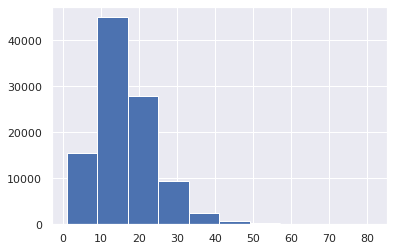

In [108]:
plt.hist(df["num_medications"])
plt.show()

#In your pair, pick one of your notebooks to start from and work ahead on the diabetes data set, assuming your outcome variable is ‘readmitted’, and making it binary where ‘NO’ is 0 and any other value is 1

In [0]:
df['readmitted'] = np.where(df['readmitted'] == 'NO', 0,1)

In [110]:
df['readmitted'].unique

<bound method Series.unique of 0         0
1         1
2         0
3         0
4         0
         ..
101761    1
101762    0
101763    0
101764    0
101765    0
Name: readmitted, Length: 101766, dtype: int64>

#Determine relationships between your input variables and your outcome. Which features have the strongest relationship?

In [111]:
df.corr()

,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,readmitted
time_in_hospital,1.000000,0.318481,0.191558,0.466224,-0.009183,-0.009749,0.073592,0.220295,0.051037
num_lab_procedures,0.318481,1.000000,0.058109,0.268262,-0.007528,-0.002246,0.039187,0.152711,0.039148
num_procedures,0.191558,0.058109,1.000000,0.385462,-0.024914,-0.038212,-0.066205,0.073774,-0.044913
num_medications,0.466224,0.268262,0.385462,1.000000,0.045310,0.013292,0.064292,0.261738,0.046634
number_outpatient,-0.009183,-0.007528,-0.024914,0.045310,1.000000,0.091374,0.107293,0.094223,0.082094
number_emergency,-0.009749,-0.002246,-0.038212,0.013292,0.091374,1.000000,0.266518,0.055928,0.102918
number_inpatient,0.073592,0.039187,-0.066205,0.064292,0.107293,0.266518,1.000000,0.104904,0.217107
number_diagnoses,0.220295,0.152711,0.073774,0.261738,0.094223,0.055928,0.104904,1.000000,0.112757
readmitted,0.051037,0.039148,-0.044913,0.046634,0.082094,0.102918,0.217107,0.112757,1.000000


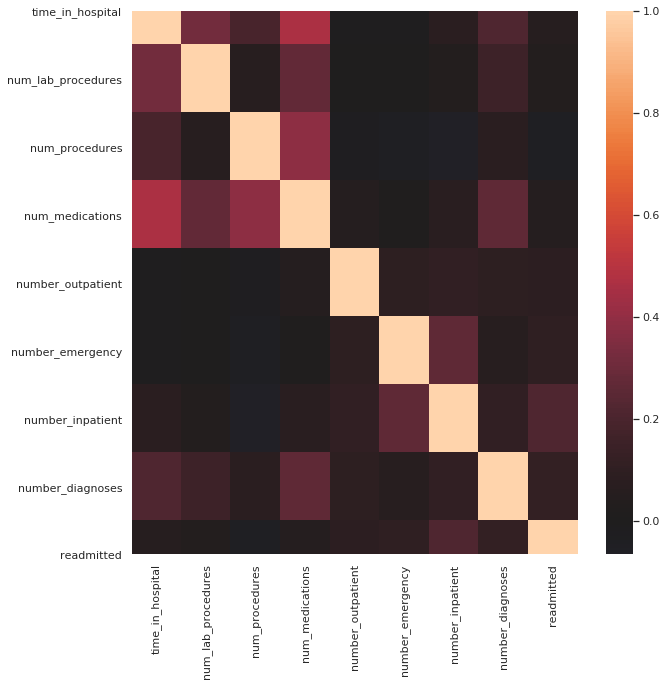

In [121]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),center = 0)
plt.show()

#Look at relationships between your input variables. Many models assume that your input variables are independent of each other. How true is that for this data set?

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


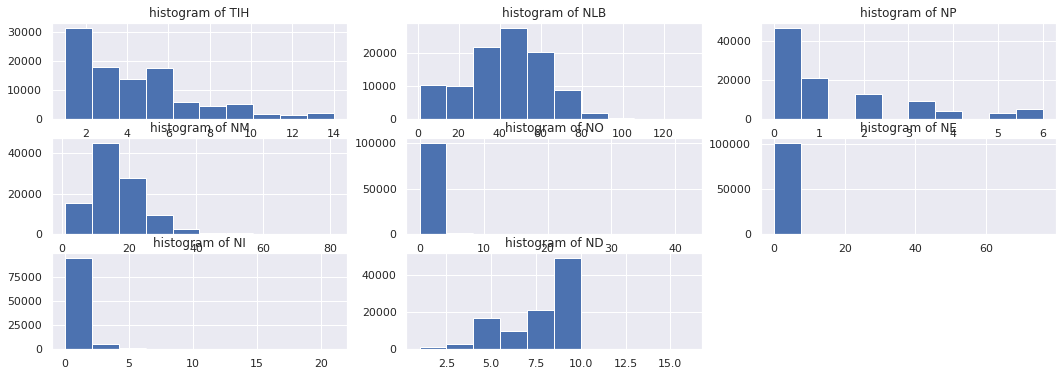

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:856: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


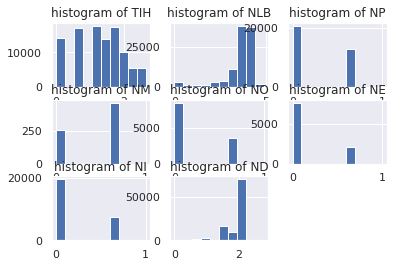

In [138]:
plt.figure(figsize=(18,6))

# histograms of the original data (input variables)
plt.subplot(3, 3, 1)
plt.hist(df['time_in_hospital'])
plt.title("histogram of TIH")

plt.subplot(3, 3, 2)
plt.hist(df['num_lab_procedures'])
plt.title("histogram of NLB")

plt.subplot(3, 3, 3)
plt.hist(df['num_procedures'])
plt.title("histogram of NP")


plt.subplot(3, 3, 4)
plt.hist(df['num_medications'])
plt.title("histogram of NM")

plt.subplot(3, 3, 5)
plt.hist(df['number_outpatient'])
plt.title("histogram of NO")

plt.subplot(3, 3, 6)
plt.hist(df['number_emergency'])
plt.title("histogram of NE")


plt.subplot(3, 3, 7)
plt.hist(df['number_inpatient'])
plt.title("histogram of NI")

plt.subplot(3, 3, 8)
plt.hist(df['number_diagnoses'])
plt.title("histogram of ND")
plt.show()

# histograms of the log transformed data
plt.subplot(3, 3, 1)
plt.hist(np.log(df['time_in_hospital']))
plt.title("histogram of TIH")

plt.subplot(3, 3, 2)
plt.hist(np.log(df['num_lab_procedures']))
plt.title("histogram of NLB")

plt.subplot(3, 3, 3)
plt.hist(np.log(df['num_procedures']), range = (0,1))
plt.title("histogram of NP")


plt.subplot(3, 3, 4)
plt.hist(np.log(df['num_medications']), range = (0,1))
plt.title("histogram of NM")

plt.subplot(3, 3, 5)
plt.hist(np.log(df['number_outpatient']),range = (0,1))
plt.title("histogram of NO")

plt.subplot(3, 3, 6)
plt.hist(np.log(df['number_emergency']),range = (0,1))
plt.title("histogram of NE")


plt.subplot(3, 3, 7)
plt.hist(np.log(df['number_inpatient']),range = (0,1))
plt.title("histogram of NI")

plt.subplot(3, 3, 8)
plt.hist(np.log(df['number_diagnoses']))
plt.title("histogram of ND")
plt.show()

#Make sure you demonstrate each of the statistical tests and each type of graph at least once. Experiment with different ways of achieving the same type of graph. There are many ways to get the same result, and it’s good to have many in your toolbox